# Task 6: Prediction Using Decision Tree Algorithm
### Data Science and Business Analytics Internship By The Sparks Foundation

#### By : Shymaa Alsayed

#### Task Definition :
- Create a decision tree classifier trained on the dataset Iris flowers to predict the right class accordingly
- Visualize it Graphically

Dataset:https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view

### Sections:
   - [Working of a Decision Tree](#tree_working)
   - [Loading and exploring dataset](#impexp)
   - [Exploratory data analysis](#expanal)
   - [Data Preprocessing](#process)
   - [Creating and training Decision tree classifier](#classifier)
   - [Visualizing the decision boundaries](#bound)
   - [Visualizing the Decision Tree Structure](#vistree)
   - [Calculating Gini Index for the first split](#gini)
   - [Evaluating decision tree model performance](#eval)
   - [Using Entropy as Criterion](#entropy)
   

### Working of a Decision Tree
<a id='tree_working'></a>

![Decision tree terminology](https://miro.medium.com/max/688/1*bcLAJfWN2GpVQNTVOCrrvw.png)
Image source:https://www.kdnuggets.com/

- Being a supervised learning model, Decision trees algorithm can be used for classification and regression tasks by learning simple decision rules inferred from the training data.
- The Learning step aims to create a tree where a new instace can be checked against theses rules in order, from the root to the leaf. A tree consists of nodes, each asking a question about a feature of the data, the top node is called the root node, where all data points are checked and then divided into subnodes or what is called decision nodes. A node that does not split any more is called leaf/terminal. 
- The choice of the root node attribute to ask a question about, then the following nodes, is done by some criteria to evaluate the quality of data splits, for example: Entropy, Gini index, Information gain. 
- **Applying this to classification trees**: The aim for choosing the root node is to find the feature that has least entropy, gini index or highest info gain, or in simple words, the feature that best splits the data for classification into homogenous classes or makes the sets have least impurities. Meaning that it is easiest for us to predict the class of the instance using this feature only because the randomness in the way of classifying using this feature is minimum and this will be the feature we use to perform the first split.
- After the first split from the root node, the next node branching from it also aims to find the feature to split upon with least entropy, gini index or highest information gain and so on. A leaf node has entropy or gini index of zero and needs no further splitting.


- **Steps to Calculate Gini index for a split**:
this method of splitting performs only binary splits, haviing success or failure as categorical variable

    1- calculate gini index for a node : 1 – ( P(class1)^2 + P(class2)^2 + … + P(classN)^2)
    
    2- calculate the total gini index for a split by adding the weighted gini index of each node: weight of node1 * gini index1 + weight of node2 * gini index2
    

### Loading and exploring dataset
<a id='impexp'></a>

#### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### Loading dataset

In [3]:
dataset=pd.read_csv('Iris.csv')

#### Exploring Dataset

In [4]:
dataset.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


- The dataset consists of 6 columns, 4 of which represent the features of Iris flowers, 1 representing the species of the flower and 1 that is just an Id column not useful for analysis or prediction

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


- The dataset consists of 150 instances, no nulls found in any column

In [6]:
flower_classes=dataset.Species.unique()
flower_classes

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
dataset.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

- There are 3 unique Iris classes, each represented with 50 instances in the dataset making it balanced in classes

In [8]:
flower_features=dataset.columns[1:-1]
flower_features

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')

In [9]:
dataset.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


### Exploratory Analysis
<a id='expanal'></a>

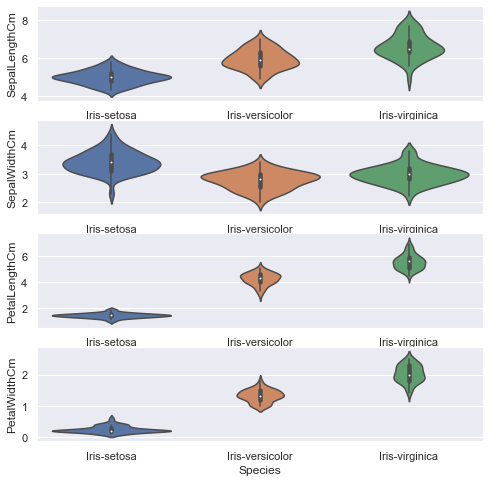

In [11]:
plt.figure(figsize=(8,8))
for i, feature in enumerate(flower_features):
    plt.subplot(4,1,i+1)
    sns.violinplot(data=dataset.iloc[1:-1],x='Species',y=feature )


- Looking at the violinplots across the three flower classes, PetalWidth and PetalLength look like the features that best separates flower classes with least overlap followed by PetalLength 

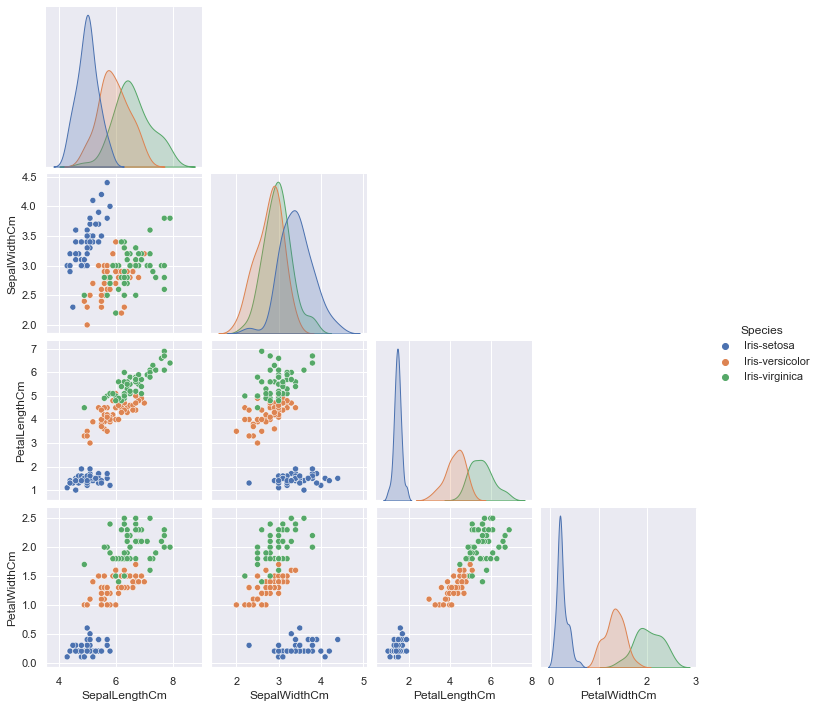

In [10]:
sns.pairplot(dataset.iloc[:,1:],corner=True,hue='Species');

- Looking at the distribution of each feature,again Petal Width and Petal Length look promising in the way they separate Iris flower classes, Iris setosa is completley separated from versicolor and virginica at 0.8 cm petalwidth and there is a small overalap between versivolor and virginca within approx 1.3  and 2 cm. Sepal Length and Sepal Width are less promising as there is big overlap area among the their distribution across different classes.

- Looking at the joint distribution of each pair of features, Strongest postivie correlation exists bewteen PetalWidth and Petal Length. Also, it seems like it is the scatter plot best separating iris classes with minimun overlap between data points.

- So we can predict that the Decision tree has one of them as the first node for the first split and the other for the second split.

### Data Preprocessing
<a id='process'></a>

- Drop unneeded Id column

In [12]:
dataset.drop('Id',axis=1, inplace=True)

- Creating feature matrix and label vector

In [13]:
X=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

- creating numeric values for label vector

In [14]:
# create a dictionary where flower class is the key, numbers 0,1,2 are values
flowers=dict(zip(dataset.Species.unique(),[0,1,2]))


def encode_flower_category(category):
    """takes an Iris flower category name and returns a numeric encoding of 0,1, or 2"""
    return flowers[category]

def get_flower_category(encoding):
    """takes a flower numeric encoding and return its name"""
    for key, value in flowers.items():
        if value==encoding: return key

- mapping the function to y vector to transform it to a numeric vector

In [15]:
y=np.array(list(map(encode_flower_category,y)))

- Splitting dataset into train and test sets, I will set the test_size to one third since the whole dataset is just 150 records


In [16]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=42)

- Feature scaling

    No need for feature scaling with decision tree classifier as it doesnt depend on euclidean distance or gradients for classification, it rather depends on the measure of impurity among features in order to Split them such that the sets contain the least impurities. It uses a function to measure the quality of a split (either entropy or the gini impurity)
    

- Shuffle train and test data to avoid overfitting

In [17]:
indx=np.arange(x_train.shape[0])
np.random.shuffle(indx)
x_train=x_train[indx]
y_train=y_train[indx]

### Creating and training Decision tree classifier
<a id='classifier'></a>

In [18]:
# creating decision tree classifer (default criterion is gini )
classifier=DecisionTreeClassifier()  

# fitting data the created model
classifier.fit(x_train,y_train)

# predicting outcomes of test data (unseen data) by the trained model
y_pred=classifier.predict(x_test)

# predicting outcomes of train data
y_pred_train=classifier.predict(x_train)

### Visualizing the decision boundaries for classification of Iris flowers based on paired features
<a id='bound'></a>

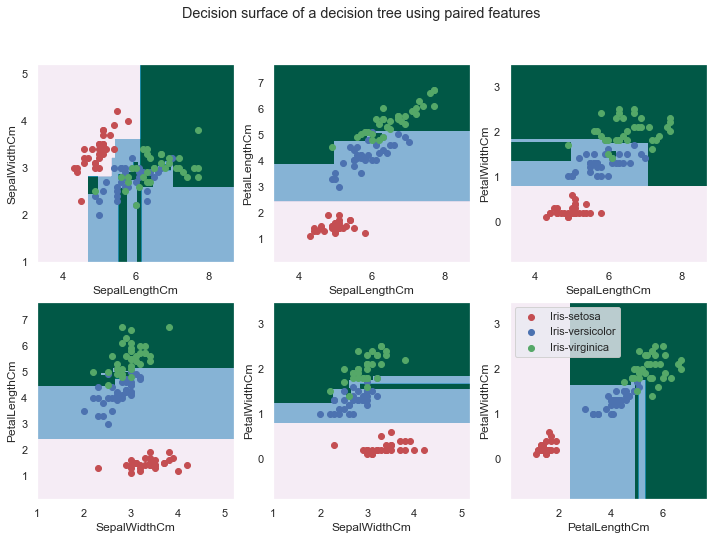

In [36]:
feature_names=dict(zip([0,1,2,3],flower_features))
plot_colors = "rbg"
plot_step=0.01

plt.figure(figsize=(12, 8))
# for each pair of features create a feature matrix and label vector
for pairidx, pair in enumerate(([0,1],[0,2],[0,3],[1,2],[1,3],[2,3])):
    X_viz=x_train[:,pair]
    y_viz=y_train
    
    # shuffle 
    idx=np.arange(X_viz.shape[0])
    np.random.shuffle(idx)
    X_viz=X_viz[idx]
    y_viz=y_viz[idx]
    
    # create the classifier and fit it 
    clf=DecisionTreeClassifier()
    clf.fit(X_viz,y_viz)
    plt.subplot(2,3,pairidx+1)
    
    # create x and y axis ranges from min & max values of the pair of features selected
    x_min, x_max = X_viz[:, 0].min() - 1, X_viz[:, 0].max() + 1
    y_min, y_max = X_viz[:, 1].min() - 1, X_viz[:, 1].max() + 1
    
    # create a meshgird using created ranges
    xx,yy=np.meshgrid(np.arange(x_min, x_max, plot_step),np.arange(y_min, y_max, plot_step))
    
    # use the model to predict the decison boundary , concatenate xx,yy values to create pair features before feeding to clf
    predictions=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    predictions=predictions.reshape(xx.shape)
    
    # plot the decision boundary on the grid
    cs = plt.contourf(xx, yy, predictions, cmap=plt.cm.PuBuGn)
    
    # plot the training points
    for flower_class, color in zip(range(3), plot_colors):
        idx = np.where(y_viz == flower_class)
        plt.scatter(X_viz[idx, 0], X_viz[idx, 1], c=color, label=get_flower_category(flower_class),
                    cmap=plt.cm.PuBuGn)
    
    plt.xlabel(feature_names[pair[0]])
    plt.ylabel(feature_names[pair[1]])
    plt.axis("tight")

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend()
plt.show()

### Visualizing the Decision Tree Structure to understand it better
<a id='vistree'></a>

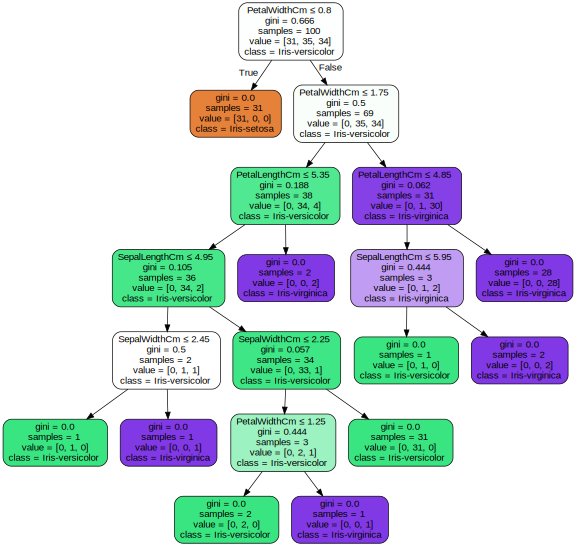

In [20]:
from sklearn.tree import export_graphviz
import graphviz
import pydotplus


data = export_graphviz(classifier,out_file=None,feature_names=flower_features,class_names=flower_classes,   
                         filled=True, rounded=True,  
                         special_characters=True)

pydot_graph = pydotplus.graph_from_dot_data(data)
pydot_graph.set_size('"8,8!"')
gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

- Using the training  data to train a decision tree, and as we predicted from exploratory analysis, The first node to split the data used Petalwidth <0.8 cm rule , if True then the class is setosa and if False, then it checks for petalwidth between 0.8 and 1.75(versicolor - because in this set there are 34 versicolor vs only 4 virginica) or greater than 1.75(virginica- as in this set there are 30 virginica and 1 versicolor).
- This means that of all features splitting this dataset into 3 classes, petalwidth had the smallest gini index. Looking at the leaf node of setosa, it has gini of zero as the set is completly homogeneous after the first split.
- The next decision checks this subnodes for petallength and assigns the class of the set according to the dominant class in it. This goes on until the last two leaf nodes have zero gini index indicating no more splits can be done.

### Calculating Gini Index for the first split
<a id='gini'></a>

**using the generated tree, lets calculate the gini index for the first split**

In [203]:
gini_true=1-(31/31)**2-(0/31)**2
print('gini true node: ',gini_true)
gini_false=1-(35/69)**2-(34/69)**2-(0/69)**2
print('gini false node: ',gini_false)

gini_weighted=(31/100)*gini_true+(69/100)*gini_false
print('gini of the split :',gini_weighted)

gini true node:  0.0
gini false node:  0.4998949800462088
gini of the split : 0.34492753623188405


**I also want to compare the gini index for the first split using petalwidth vs petallength as root node so,
I created a set of functions that implement caclculation of gini index for a split of the whole data using any feature**

In [198]:
from collections import Counter
def get_class_pcnts(class_counts, part_len):
    class0_percent=class_counts[0]/part_len
    class1_percent=class_counts[1]/part_len
    class2_percent=class_counts[2]/part_len
    return class0_percent, class1_percent, class2_percent

def gini_index_for_node(pcnt1,pcnt2,pcnt3):
    return 1-(pcnt1**2 +pcnt2**2+ pcnt3**2)
    

def gini_index_for_split(threshold, feature, labels):
        
        partition_true,partition_false=[],[]
        feature_len=len(feature)
        for i, f in enumerate(feature):
            if f < threshold:
                partition_true.append(labels[i])
            else: 
                partition_false.append(labels[i])
                
        part_true_len=len(partition_true)
        part_false_len=len(partition_false)

        true_class_counts=Counter(partition_true)
        true_class0_pcnt, true_class1_pcnt, true_class2_pcnt=get_class_pcnts(true_class_counts, part_true_len)
        gini_node_true=gini_index_for_node(true_class0_pcnt,true_class1_pcnt,true_class2_pcnt)
        print('True node gini index: ',gini_node_true)
        true_node_weight=sum(true_class_counts.values())/feature_len
        
        false_class_counts=Counter(partition_false)
        false_class0_pcnt, false_class1_pcnt, false_class2_pcnt=get_class_pcnts(false_class_counts, part_false_len)
        gini_node_false=gini_index_for_node(false_class0_pcnt,false_class1_pcnt,false_class2_pcnt)
        print('False node gini index: ',gini_node_false)
        false_node_weight=sum(false_class_counts.values())/feature_len
        
        total_gini_of_split=true_node_weight*gini_node_true + false_node_weight*gini_node_false
        
        return total_gini_of_split


#### PetalWidth


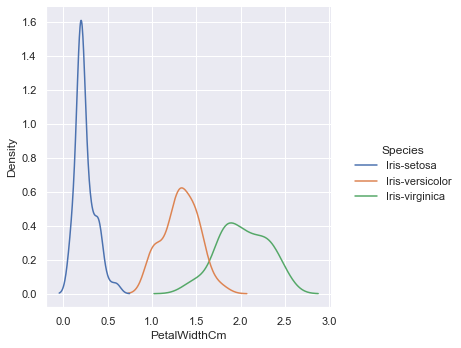

In [192]:
sns.displot(dataset,x='PetalWidthCm',hue='Species',kind='kde');


- using sepalwidth as root node to split the data, from its distribution, at around 0.8 cm,  setosa is separated from the other two classes perfectly so i will use this rule.

In [206]:
petal_width=x_train[:,-1]
print('gini_for the split : ',gini_index_for_split(0.8, petal_width, y_train))

True node gini index:  0.0
False node gini index:  0.4998949800462087
gini_for the split :  0.344927536231884


#### SepalLength

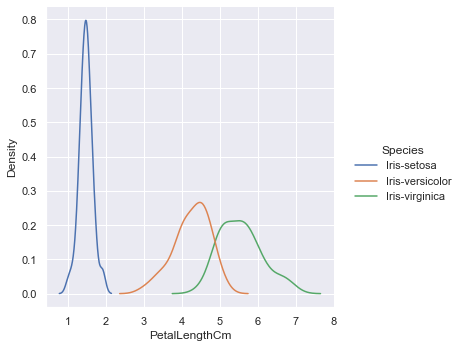

In [193]:
sns.displot(dataset,x='PetalLengthCm',hue='Species',kind='kde');

- using petal length as root node to split the data, from its distribution, at around 2.2 cm, setosa is separated from the other two classes perfectly so i will use this rule.

In [204]:
petal_length=x_train[:,2]
print('gini_sor the split : ',gini_index_for_split(2.2, petal_length, y_train))

True node gini index:  0.0
False node gini index:  0.4998949800462087
gini_sor the split :  0.344927536231884


- It turns out there is almost no difference in using either one of the, as the first node to split the data as they have the same gini index

### Evaluating decision tree model performance
<a id='eval'></a>

In [77]:
test_accuracy=accuracy_score(y_test,y_pred)
train_accuracy=accuracy_score(y_train,y_pred_train)
print('training Accuracy score: ',train_accuracy)
print('testing Accuracy score: ',test_accuracy)


training Accuracy score:  1.0
testing Accuracy score:  0.96


Since the data consists of balanced classes, 50 class of each color , we can count on Accuracy as a metric for evaluting model performance. The model seems to generalize well and perform well on unseen data as the difference between training and testing accuracy is low.

Lets also plot the confusion matrix

In [45]:
labels= [get_flower_category(i).replace('Iris-','').capitalize() for i in range(3)]
labels

['Setosa', 'Versicolor', 'Virginica']

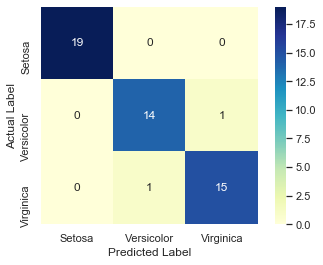

In [51]:
conf_matrix = confusion_matrix(y_test,y_pred)
sns.heatmap(conf_matrix,annot=True, fmt="",cmap='YlGnBu', xticklabels=labels, yticklabels=labels, square=True)
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label');

- Looking at the confusion matrix , the model misclassifies only one instance of versicolor as virginia and one instance of virginca as versicolor.

In [23]:
report=classification_report(y_test,y_pred)
print('classification_report \n', report)

classification_report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.93      0.93      0.93        15
           2       0.94      0.94      0.94        16

    accuracy                           0.96        50
   macro avg       0.96      0.96      0.96        50
weighted avg       0.96      0.96      0.96        50



### Using entropy as Criterion

**I'd like to try to build a decision classifier using entropy as the criterion to estimate quality of splits**

In [79]:
# creating decision tree classifer (default criterion is gini )
classifier2=DecisionTreeClassifier(criterion='entropy')  

# fitting data the created model
classifier2.fit(x_train,y_train)

# predicting outcomes of test data (unseen data) by the trained model
y_pred=classifier2.predict(x_test)

# predicting outcomes of train data
y_pred_train=classifier2.predict(x_train)

In [80]:
test_accuracy2=accuracy_score(y_test,y_pred)
train_accuracy2=accuracy_score(y_train,y_pred_train)
print('training Accuracy score: ',train_accuracy2)
print('testing Accuracy score: ',test_accuracy2)


training Accuracy score:  1.0
testing Accuracy score:  0.98


It turns out that it performs just as well as using gini index as the criterion of choice

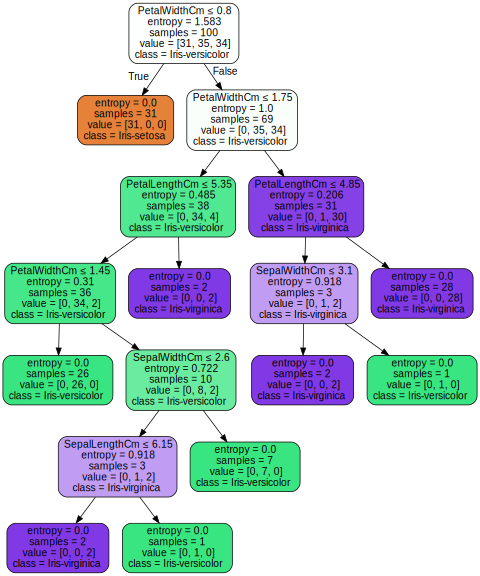

In [81]:
data2 = export_graphviz(classifier2,out_file=None,feature_names=flower_features,class_names=flower_classes,   
                         filled=True, rounded=True,  
                         special_characters=True)

pydot_graph2 = pydotplus.graph_from_dot_data(data2)
pydot_graph2.set_size('"8,8!"')
gvz_graph2 = graphviz.Source(pydot_graph2.to_string())
gvz_graph2